## Multiple Minima vs Initial Guess & Advanced Functions
### $g(x) = x^4 - 4x^2 + 5$

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [6]:
def f(x):
    return x**2 + x + 1

In [4]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

# Write the g(x) and d(x) function
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

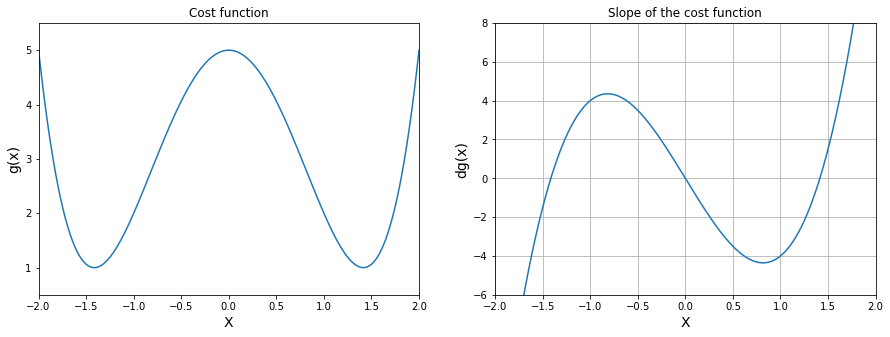

In [9]:
# plot function and derivative side by side 
plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)
plt.title("Cost function")
plt.xlabel("X", fontsize=14)
plt.ylabel("g(x)", fontsize=14)
plt.plot(x_2, g(x_2))

plt.subplot(1, 2, 2)
plt.xlim([-2, 2])
plt.ylim(-6, 8)
plt.title("Slope of the cost function")
plt.xlabel("X", fontsize=14)
plt.ylabel("dg(x)", fontsize=14)
plt.grid()
plt.plot(x_2, dg(x_2))
plt.show()

In [14]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    
    for n in range(500):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        
        step_size = abs(new_x - previous_x)
        x_list.append(new_x) 
        slope_list.append(derivative_func(new_x))
        
        if step_size < precision:
            break
            
    return new_x, x_list, slope_list

In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, multiplier=0.02,
                                                precision=0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4122375085019094
Number of steps: 23


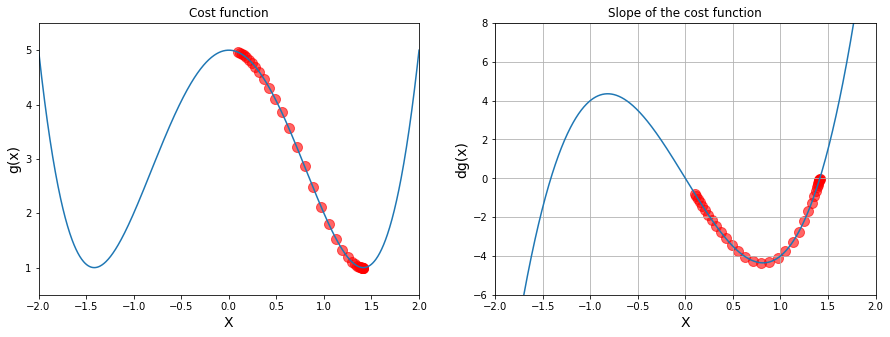

In [20]:
# calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.1)

# plot function, derivative and scatter plot side by side 
plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)
plt.title("Cost function")
plt.xlabel("X", fontsize=14)
plt.ylabel("g(x)", fontsize=14)

plt.plot(x_2, g(x_2))
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

plt.subplot(1, 2, 2)
plt.xlim([-2, 2])
plt.ylim(-6, 8)
plt.title("Slope of the cost function")
plt.xlabel("X", fontsize=14)
plt.ylabel("dg(x)", fontsize=14)
plt.grid()

plt.plot(x_2, dg(x_2))
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)

plt.show()